In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import folium
import numpy as np
from IPython.display import Markdown
from sklearn.preprocessing import LabelEncoder

def bold(string):
    display(Markdown(string))

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install colorama

In [5]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('seaborn-v0_8-pastel')

In [7]:
df = pd.read_csv("/content/NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# New Section

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

None

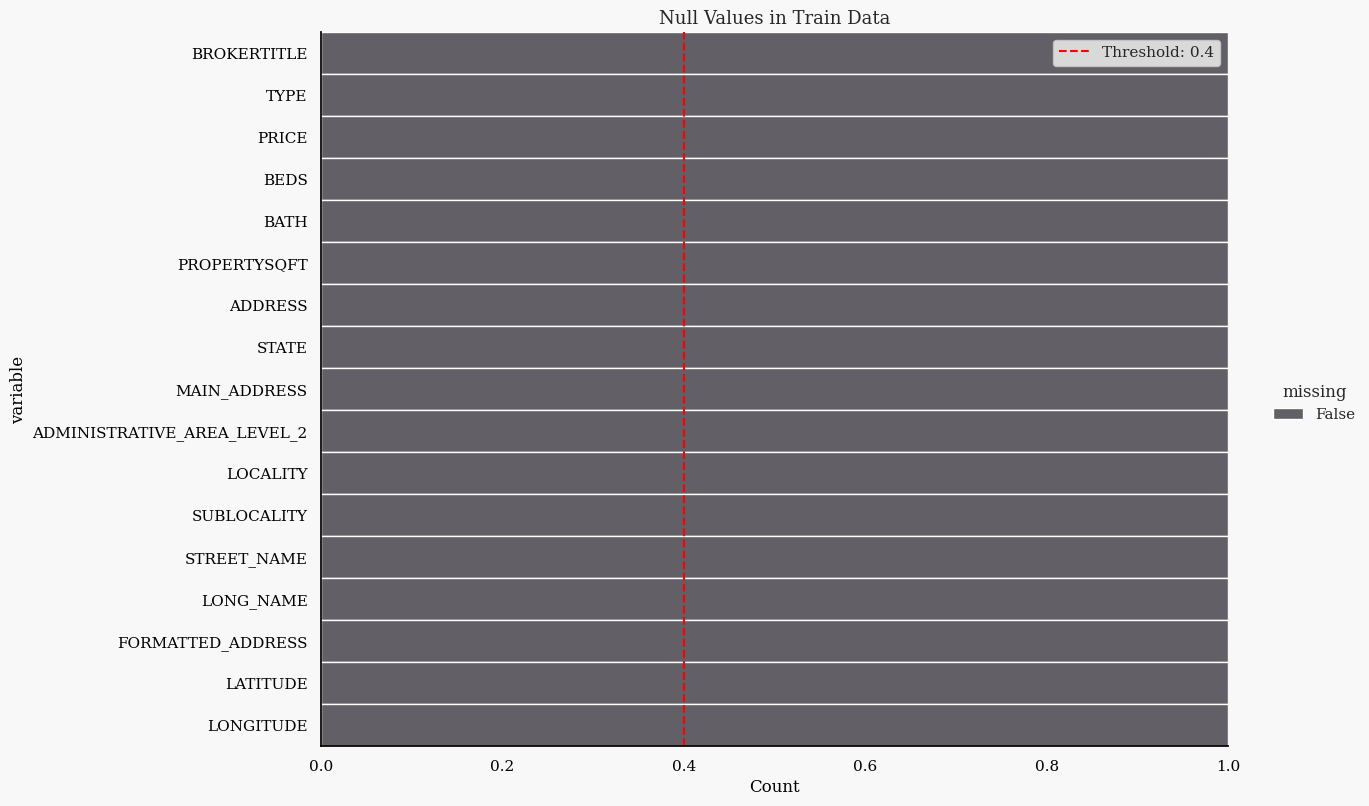

In [9]:
custom_palette = ['#302c36', '#037d97']  # Specify custom colors for the plot

missing_data_plot = sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.6,
    palette=custom_palette  # Set the custom color palette
)

# specifying a threshold value with a red color
plt.axvline(0.4, color='red', linestyle='--', label='Threshold: 0.4')
plt.title('Null Values in Train Data', fontsize=13)
plt.legend()  # Show legend for the threshold line
plt.show()

In [10]:
# Selecting relevant columns and sorting by PRICE in descending order
data = df[['LONGITUDE', 'LATITUDE', 'PRICE', 'STREET_NAME']].sort_values(by='PRICE', ascending=False).head(500)

# Renaming columns for convenience
data.rename(columns={'LONGITUDE': 'lon', 'LATITUDE': 'lat', 'PRICE': 'value', 'STREET_NAME': 'name'}, inplace=True)

# Creating a Folium map centered at [48, -102] with OpenStreetMap tiles and zoom level 3
m = folium.Map(location=[48, -102], tiles="OpenStreetMap", zoom_start=3)

# Adding markers for each data point
for i in range(len(data)):
    folium.Marker(
        location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
        popup=f"Price: ${data.iloc[i]['value']:,}",  # Formatting price with commas
    ).add_to(m)

# Adding a title to the map
map_title = "500 Most Expensive Houses"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw"><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

# Fitting the map bounds to the data
sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()
m.fit_bounds([sw, ne])

# Displaying the map
m

In [12]:

# Selecting relevant columns and sorting by PRICE in ascending order (least costly)
data = df[['LATITUDE', 'LONGITUDE', 'PRICE', 'STREET_NAME']].sort_values(by='PRICE').head(500)

# Renaming columns for convenience
data.rename(columns={'LATITUDE': 'lat', 'LONGITUDE': 'lon', 'PRICE': 'value', 'STREET_NAME': 'name'}, inplace=True)

# Creating a Folium map centered at [48, -102] with OpenStreetMap tiles and zoom level 3
m = folium.Map(location=[48, -102], tiles="OpenStreetMap", zoom_start=3)

# Adding markers for each data point
for _, row in data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Price: ${row['value']:,}",  # Formatting price with commas
    ).add_to(m)

# Adding a title to the map
map_title = "500 Least Costly Houses"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw"><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

# Fitting the map bounds to the data
sw, ne = data[['lat', 'lon']].min().tolist(), data[['lat', 'lon']].max().tolist()
m.fit_bounds([sw, ne])

# Displaying the map
m

In [13]:
columns_to_drop = ['LONGITUDE', 'LATITUDE', 'FORMATTED_ADDRESS', 'LONG_NAME', 'STREET_NAME',
                   'ADMINISTRATIVE_AREA_LEVEL_2', 'MAIN_ADDRESS', 'STATE', 'ADDRESS', 'BROKERTITLE']

df.drop(columns=columns_to_drop, inplace=True)
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


In [14]:
column_mapping = {
    'PRICE': 'price', 'BEDS': 'beds', 'BATH': 'bath',
    'PROPERTYSQFT': 'area', 'LOCALITY': 'place',
    'SUBLOCALITY': 'sublocality', 'TYPE': 'type'
}

df.rename(columns=column_mapping, inplace=True)
df.head()

,type,price,beds,bath,area,place,sublocality
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


In [15]:
df = df.drop(df[df['price'] == 2147483647].index)
df = df.drop(df[df['price'] == 195000000].index)

In [16]:
df.head()

,type,price,beds,bath,area,place,sublocality
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County
5,House for sale,690000,5,2.000000,4004.0,New York,Kings County


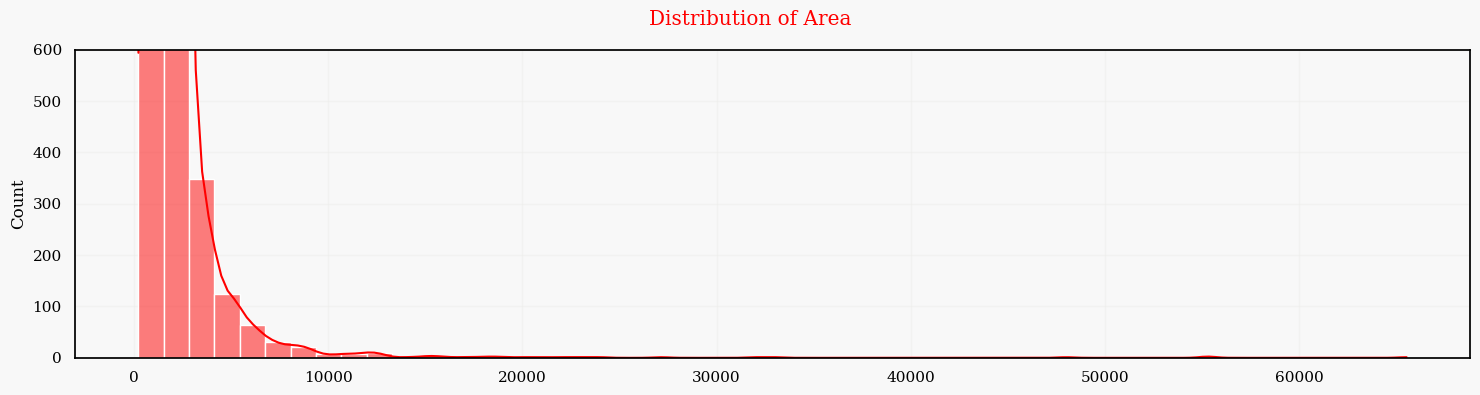

In [19]:
# Set the figure size
plt.figure(figsize=(18, 4))

# Create a histogram with kernel density estimation using seaborn, setting color to red
sns.histplot(data=df, x='area', bins=50, kde=True, color='red')

# Set y-axis limit
plt.ylim(0, 600)

# Format tick labels
plt.ticklabel_format(style='plain')

# Remove x-axis label
plt.xlabel('')

# Set the overall title
plt.suptitle('Distribution of Area', color='red')

# Display the plot
plt.show()

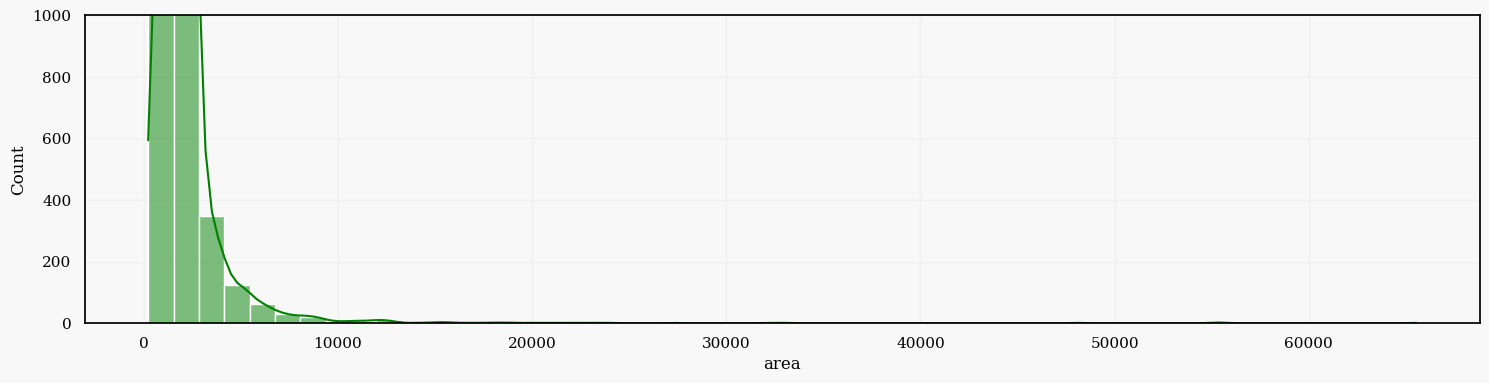

In [22]:
fig, ax = plt.subplots(figsize=(18, 4))

# Create a histogram with kernel density estimation using seaborn, setting color to dark blue
sns.histplot(data=df, x='area', bins=50, kde=True, color='green')

# Set y-axis limit
plt.ylim(0, 1000)

# Format tick labels
plt.ticklabel_format(style='plain')

# Display the plot
plt.show()

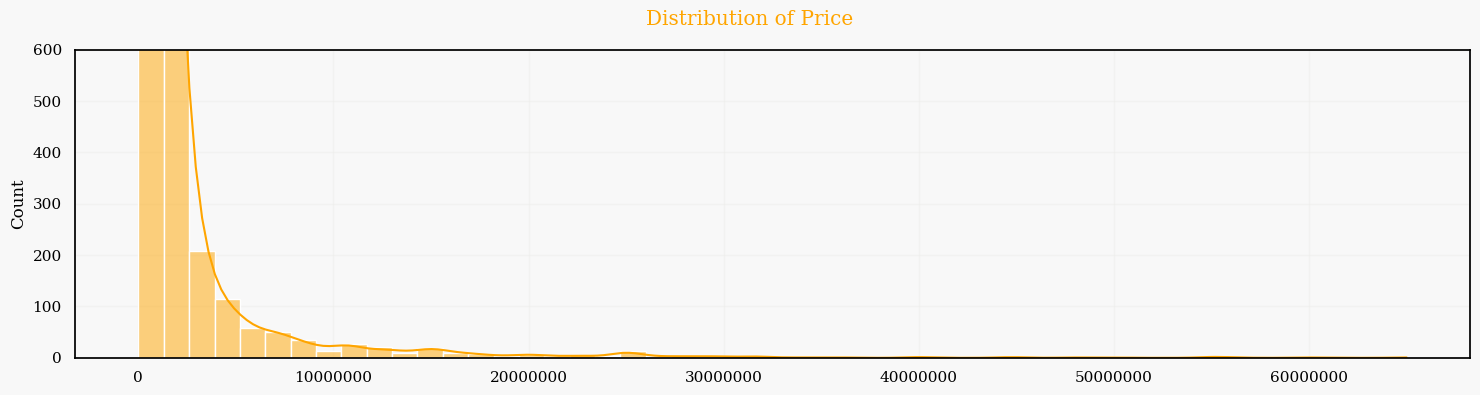

In [21]:
# Set the figure size and create subplots
fig, ax = plt.subplots(figsize=(18, 4))

# Create a histogram with kernel density estimation using seaborn, setting color to orange
sns.histplot(data=df, x='price', bins=50, kde=True, color='orange')

# Set y-axis limit
plt.ylim(0, 600)

# Format tick labels
plt.ticklabel_format(style='plain')

# Remove x-axis label
plt.xlabel('')

# Set the overall title
plt.suptitle('Distribution of Price', color='orange')

# Display the plot
plt.show()

In [24]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Encode categorical columns in the DataFrame
df['place'] = le.fit_transform(df['place'])
df['sublocality'] = le.fit_transform(df['sublocality'])
df['type'] = le.fit_transform(df['type'])

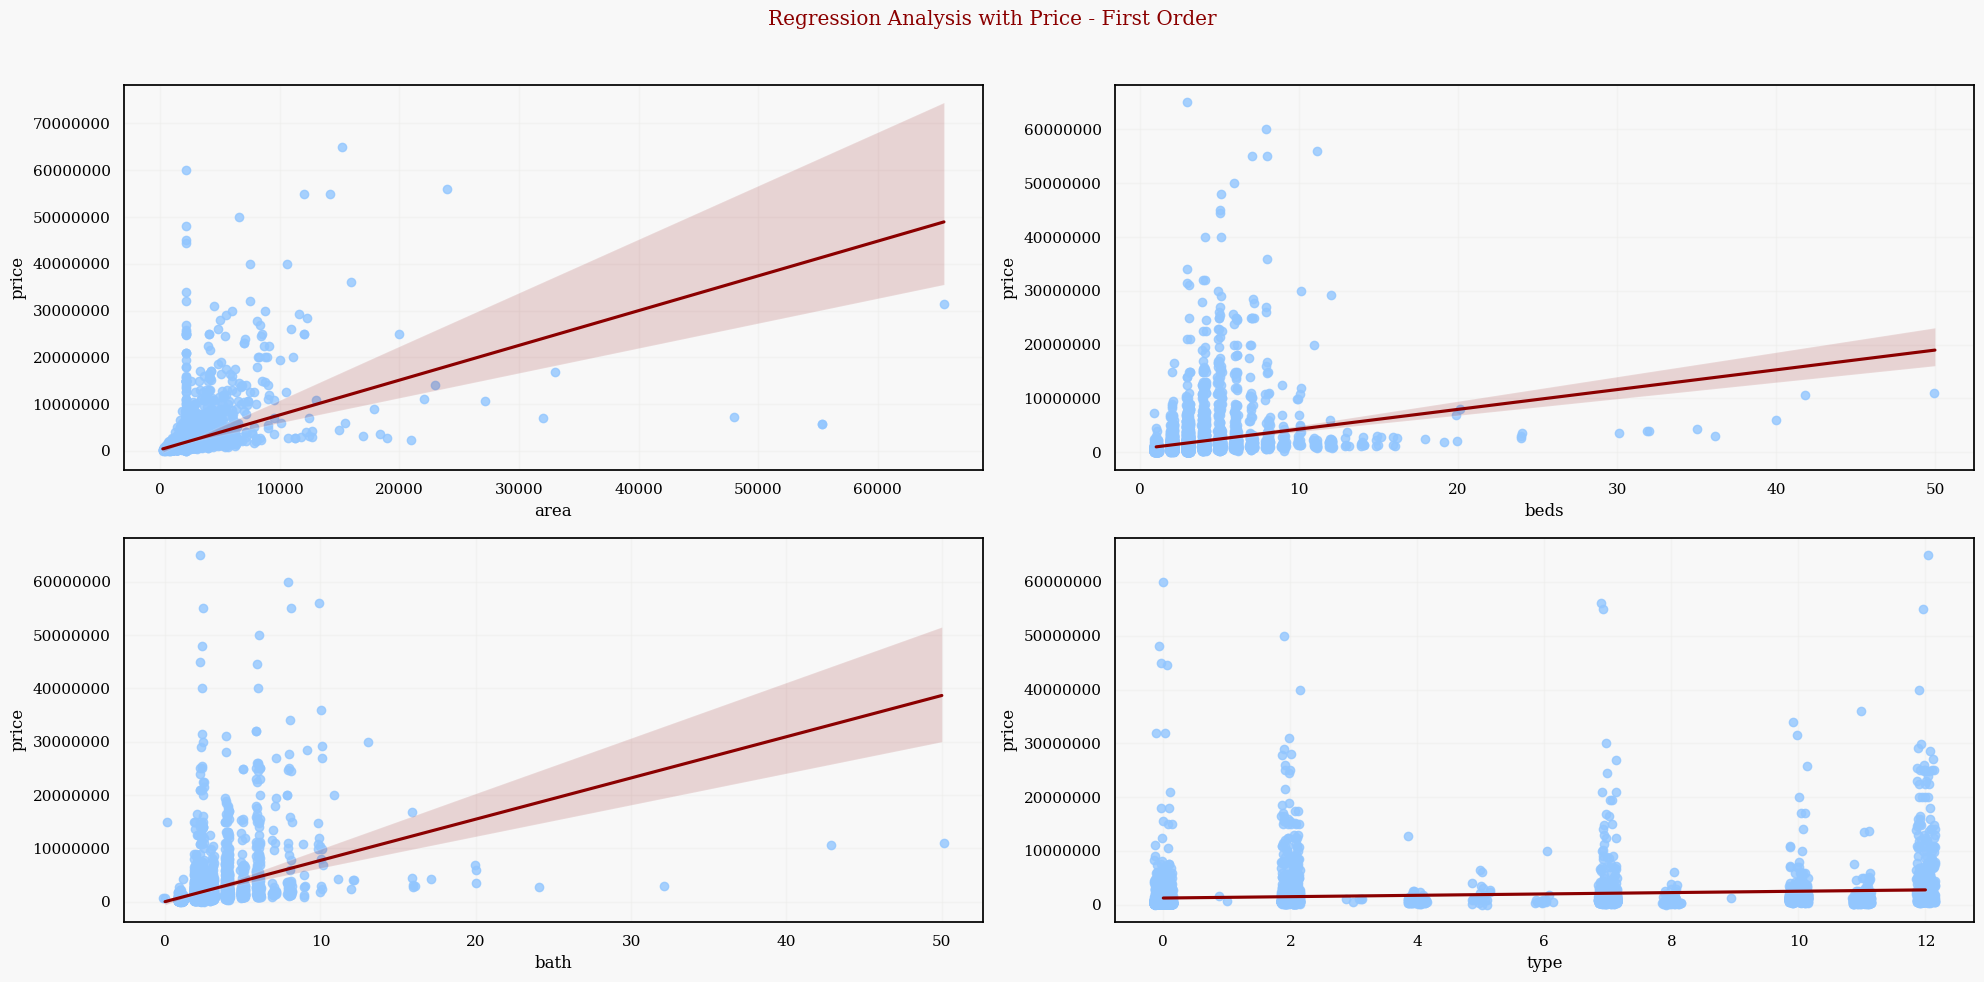

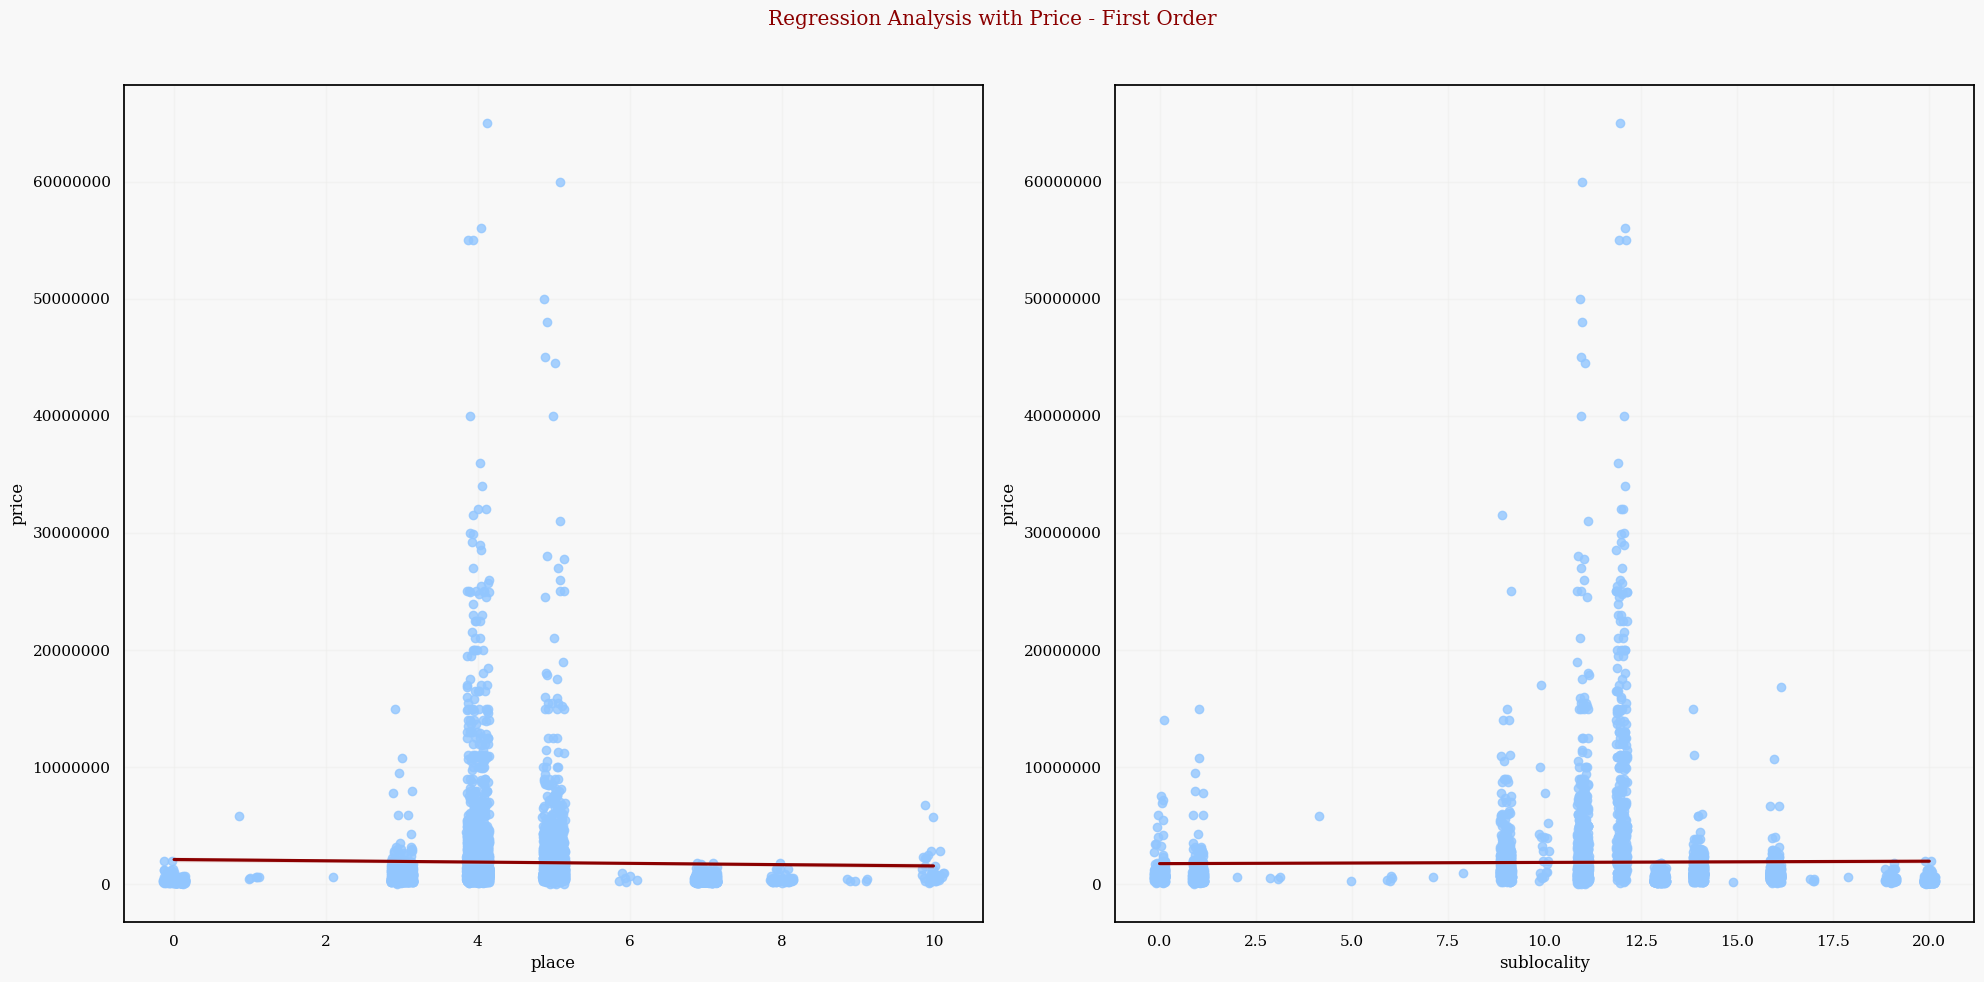

In [27]:
# Set the overall figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Plot 1
sns.regplot(data=df, x="area", y="price", x_jitter=.15, line_kws=dict(color="darkred"), ax=axes[0, 0])
axes[0, 0].ticklabel_format(style='plain')

# Plot 2
sns.regplot(data=df, x="beds", y="price", x_jitter=.15, line_kws=dict(color="darkred"), ax=axes[0, 1])
axes[0, 1].ticklabel_format(style='plain')

# Plot 3
sns.regplot(data=df, x="bath", y="price", x_jitter=.15, line_kws=dict(color="darkred"), ax=axes[1, 0])
axes[1, 0].ticklabel_format(style='plain')

# Plot 4
sns.regplot(data=df, x="type", y="price", x_jitter=.15, line_kws=dict(color="darkred"), ax=axes[1, 1])
axes[1, 1].ticklabel_format(style='plain')

# Set the overall title for the first set of plots
plt.suptitle('Regression Analysis with Price - First Order', color='darkred')

# Adjust layout for the first set of plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the first set of plots
plt.show()

# Set the overall figure size for the second set of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot 5
sns.regplot(data=df, x="place", y="price", x_jitter=.15, line_kws=dict(color="darkred"), ax=axes[0])
axes[0].ticklabel_format(style='plain')

# Plot 6
sns.regplot(data=df, x="sublocality", y="price", x_jitter=.15, line_kws=dict(color="darkred"), ax=axes[1])
axes[1].ticklabel_format(style='plain')

# Set the overall title for the second set of plots
plt.suptitle('Regression Analysis with Price - First Order', color='darkred')

# Adjust layout for the second set of plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the second set of plots
plt.show()

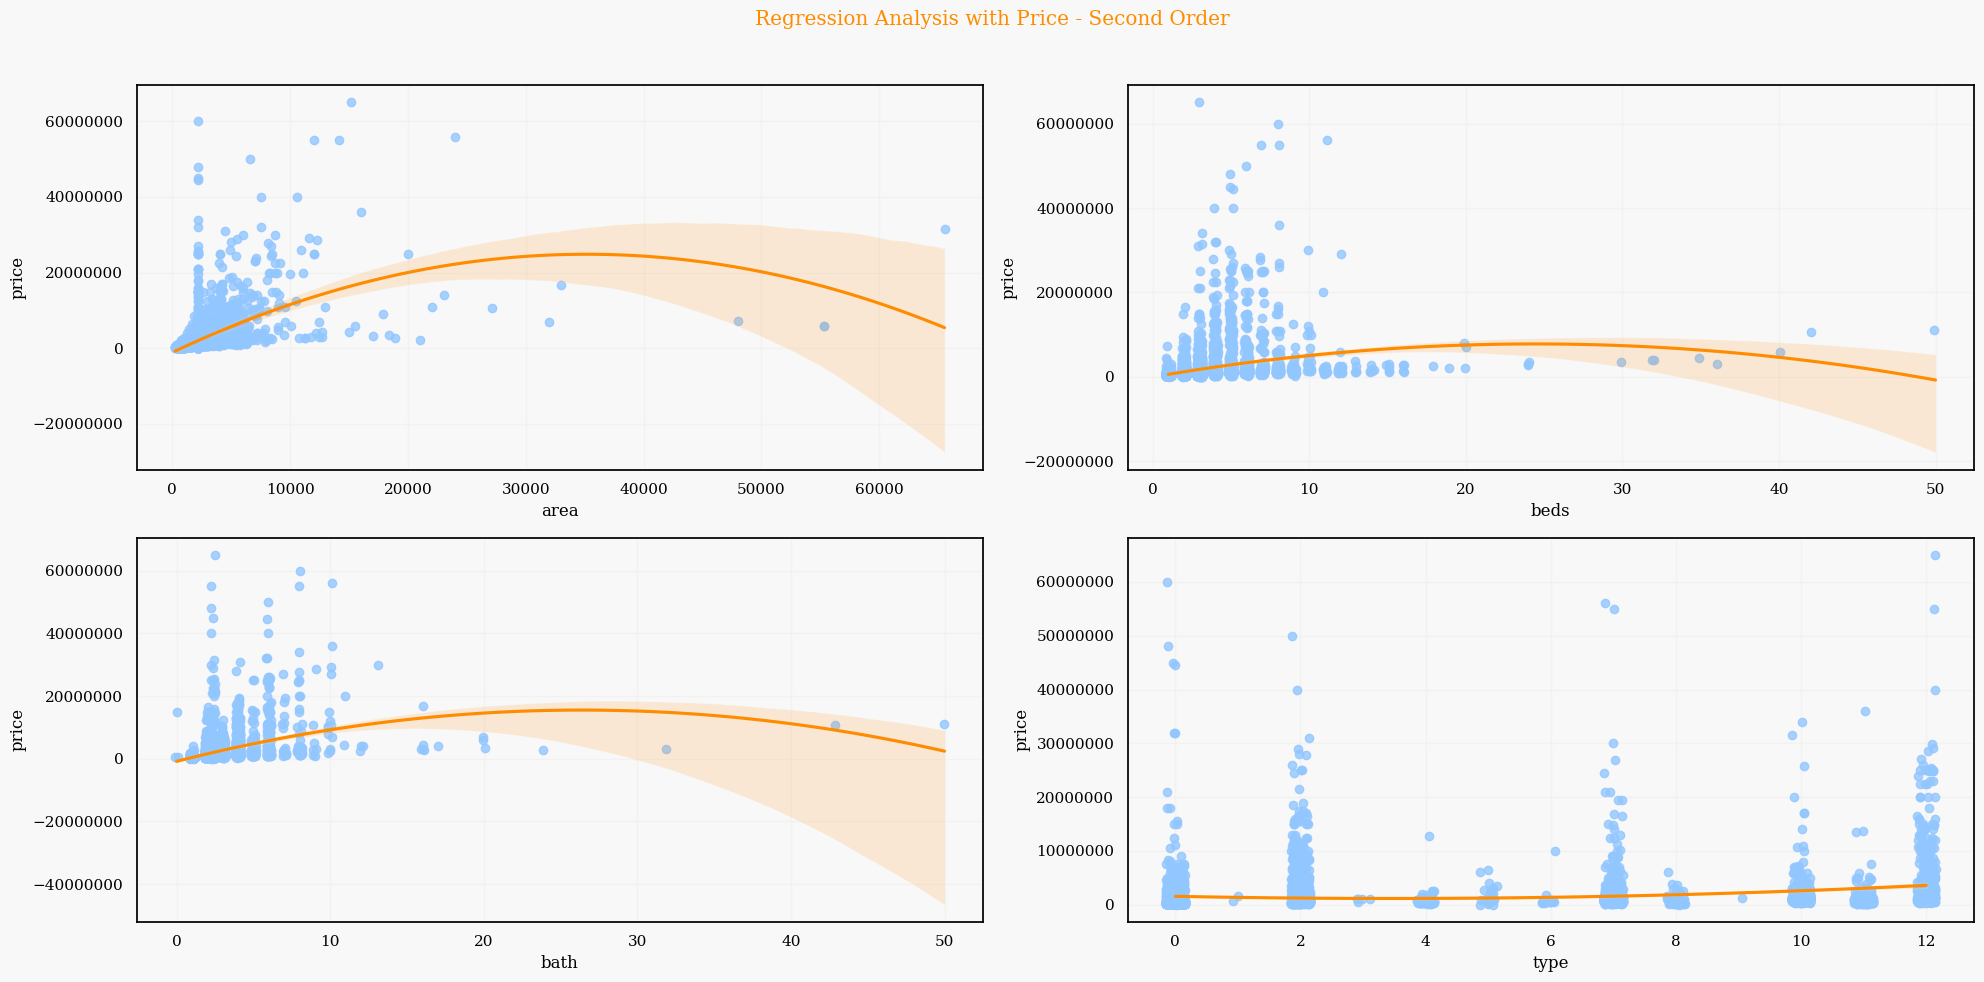

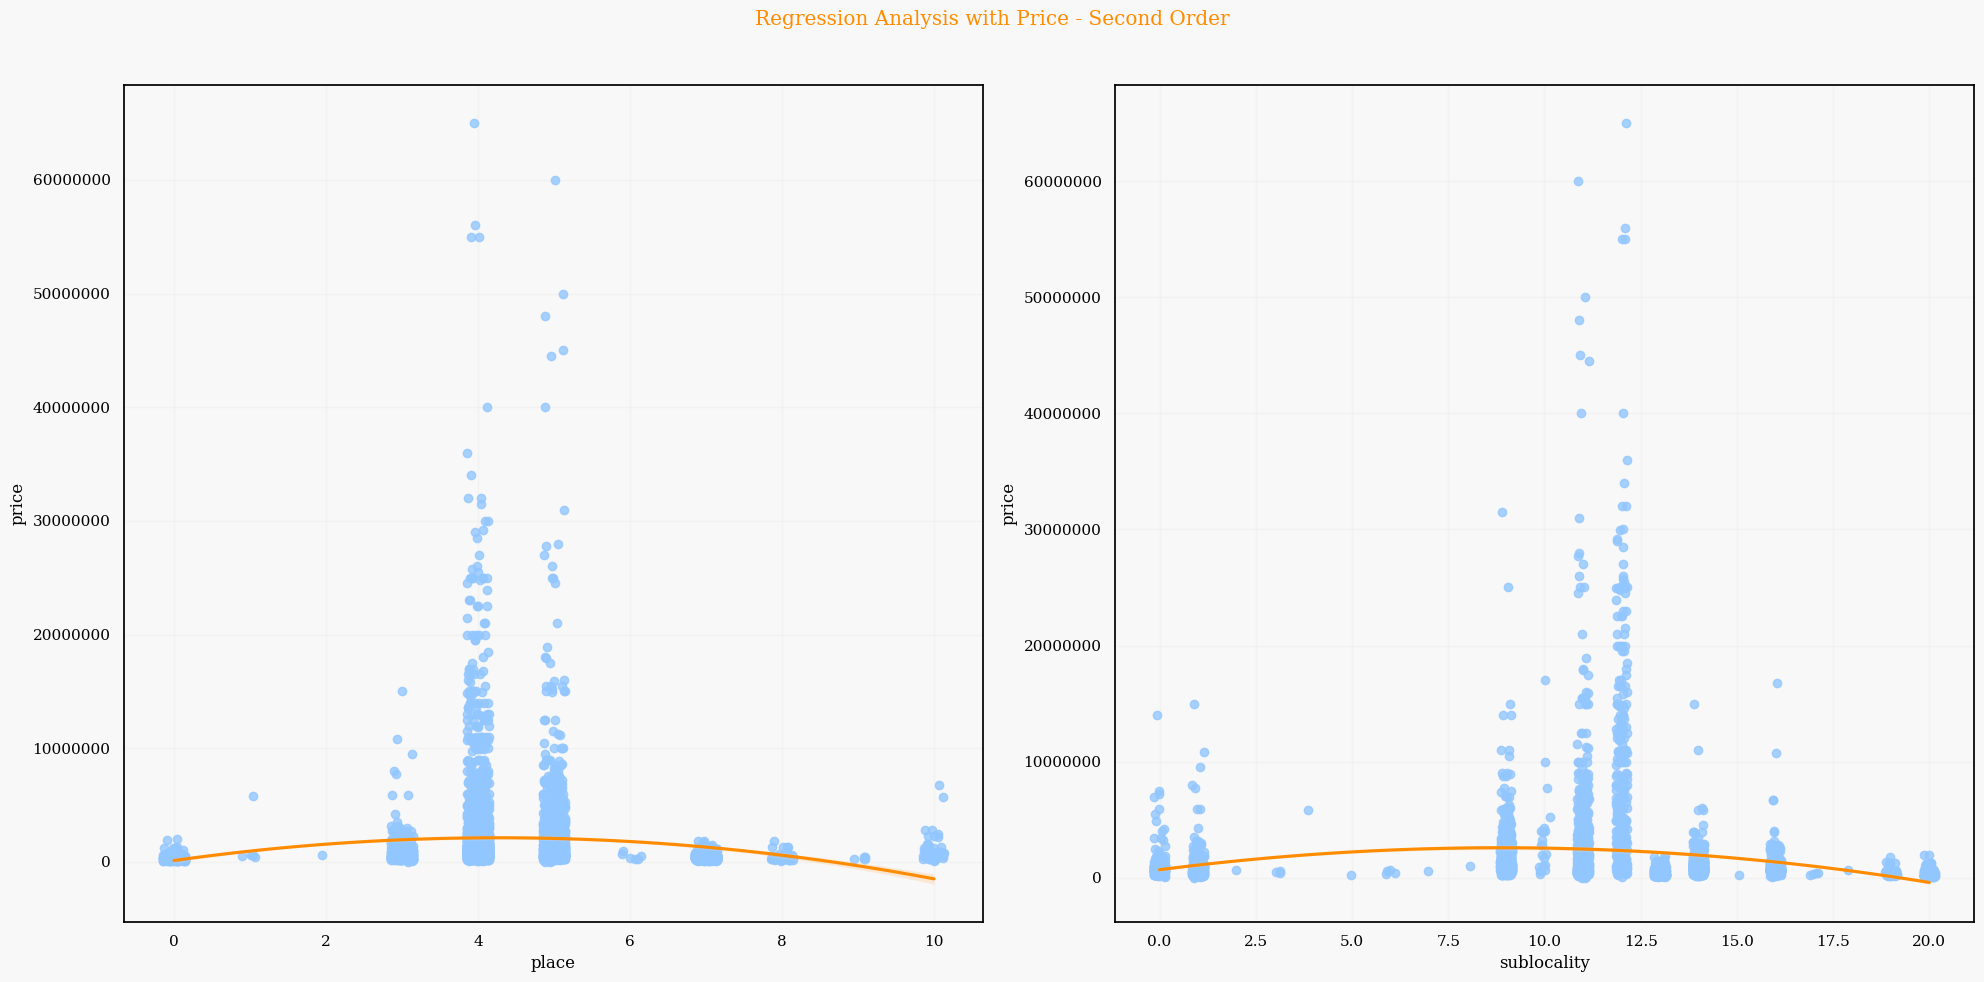

In [28]:
# Set the overall figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Plot 1
sns.regplot(data=df, x="area", y="price", order=2, x_jitter=.15, line_kws=dict(color="darkorange"), ax=axes[0, 0])
axes[0, 0].ticklabel_format(style='plain')

# Plot 2
sns.regplot(data=df, x="beds", y="price", order=2, x_jitter=.15, line_kws=dict(color="darkorange"), ax=axes[0, 1])
axes[0, 1].ticklabel_format(style='plain')

# Plot 3
sns.regplot(data=df, x="bath", y="price", order=2, x_jitter=.15, line_kws=dict(color="darkorange"), ax=axes[1, 0])
axes[1, 0].ticklabel_format(style='plain')

# Plot 4
sns.regplot(data=df, x="type", y="price", order=2, x_jitter=.15, line_kws=dict(color="darkorange"), ax=axes[1, 1])
axes[1, 1].ticklabel_format(style='plain')

# Set the overall title for the first set of plots
plt.suptitle('Regression Analysis with Price - Second Order', color='darkorange')

# Adjust layout for the first set of plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the first set of plots
plt.show()

# Set the overall figure size for the second set of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot 5
sns.regplot(data=df, x="place", y="price", order=2, x_jitter=.15, line_kws=dict(color="darkorange"), ax=axes[0])
axes[0].ticklabel_format(style='plain')

# Plot 6
sns.regplot(data=df, x="sublocality", y="price", order=2, x_jitter=.15, line_kws=dict(color="darkorange"), ax=axes[1])
axes[1].ticklabel_format(style='plain')

# Set the overall title for the second set of plots
plt.suptitle('Regression Analysis with Price - Second Order', color='darkorange')

# Adjust layout for the second set of plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the second set of plots
plt.show()

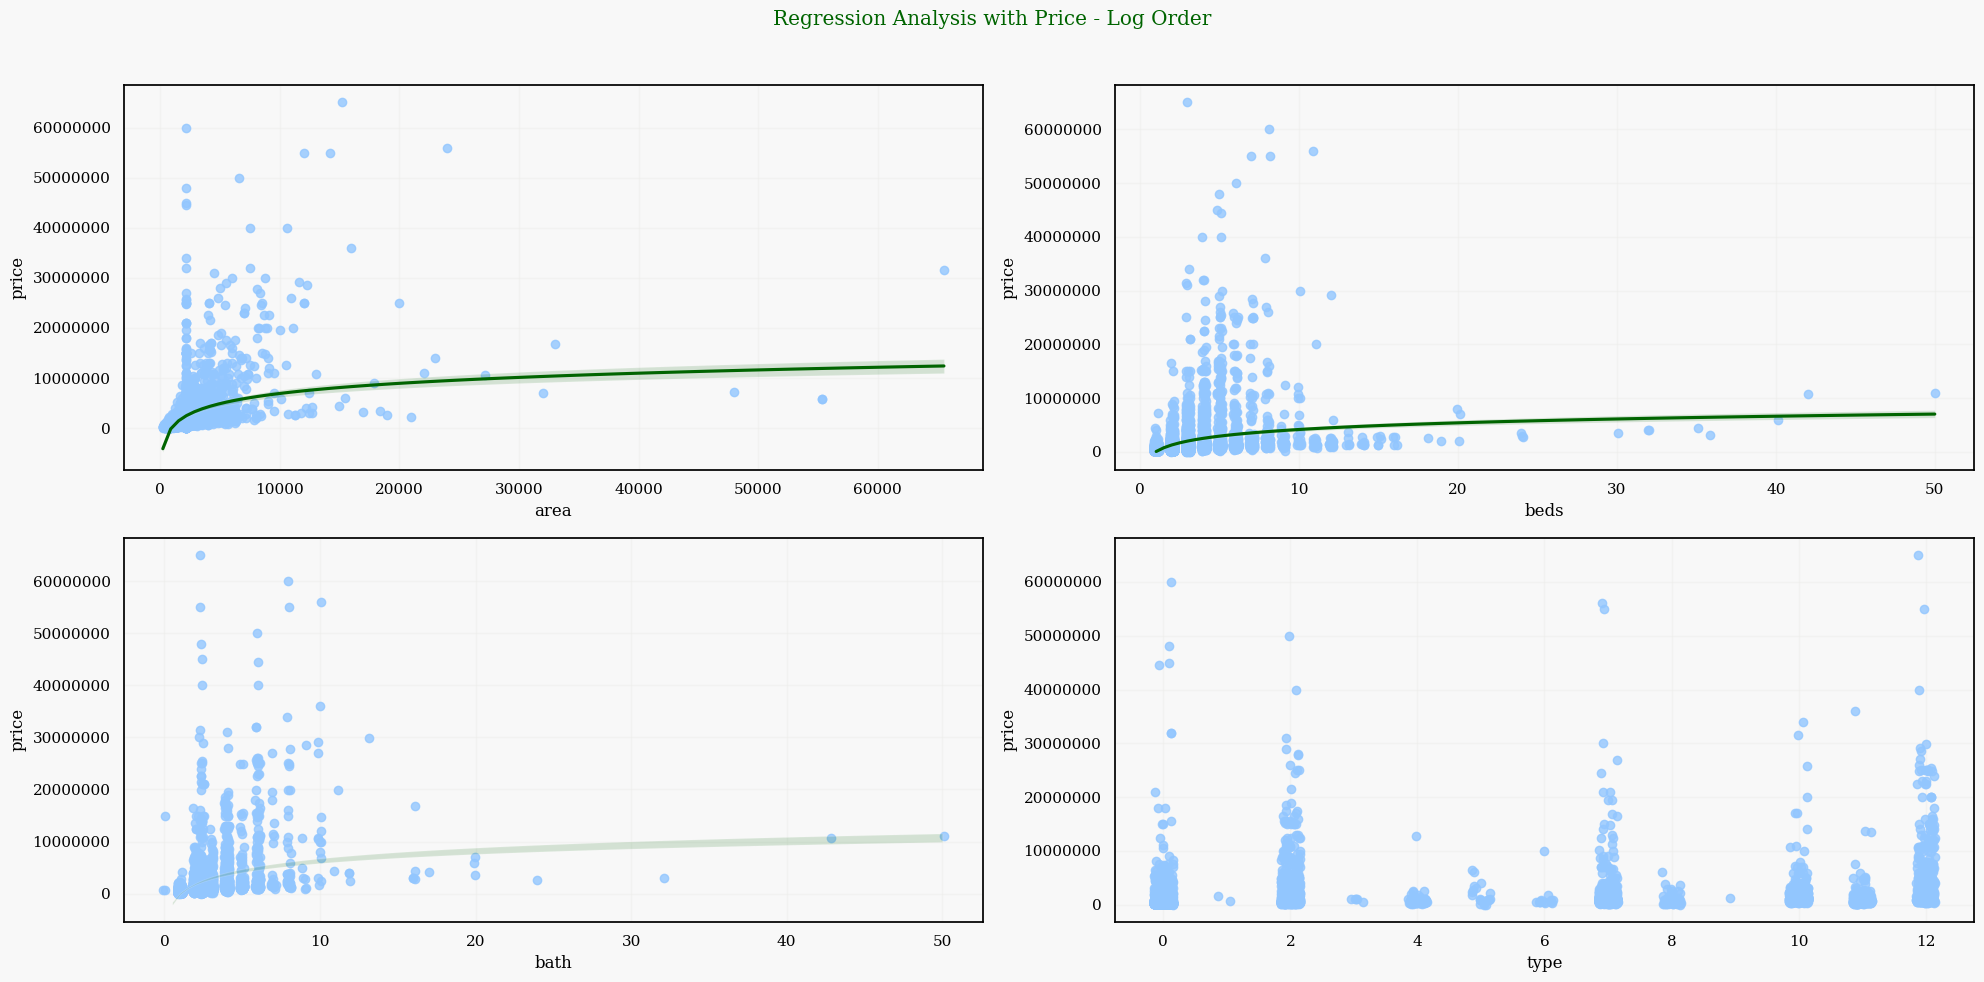

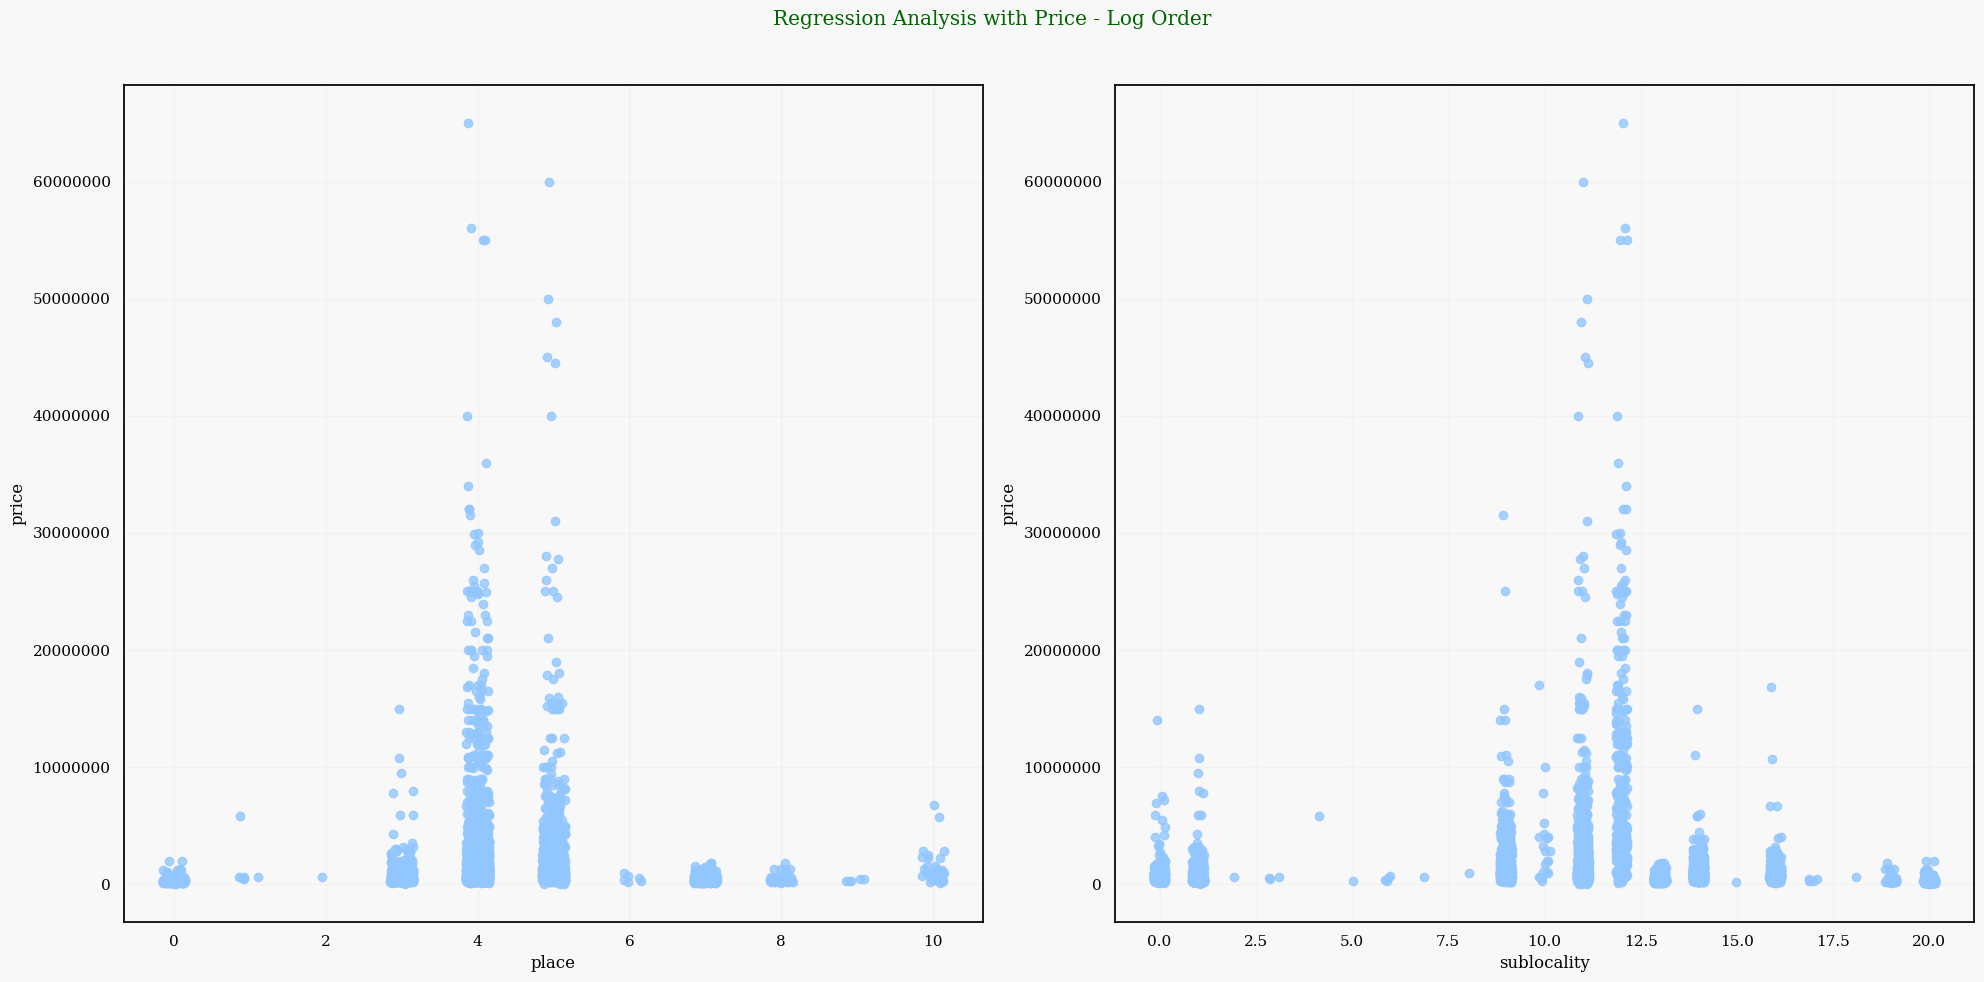

In [29]:
# Set the overall figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Plot 1
sns.regplot(data=df, x="area", y="price", logx=True, x_jitter=.15, line_kws=dict(color="darkgreen"), ax=axes[0, 0])
axes[0, 0].ticklabel_format(style='plain')

# Plot 2
sns.regplot(data=df, x="beds", y="price", logx=True, x_jitter=.15, line_kws=dict(color="darkgreen"), ax=axes[0, 1])
axes[0, 1].ticklabel_format(style='plain')

# Plot 3
sns.regplot(data=df, x="bath", y="price", logx=True, x_jitter=.15, line_kws=dict(color="darkgreen"), ax=axes[1, 0])
axes[1, 0].ticklabel_format(style='plain')

# Plot 4
sns.regplot(data=df, x="type", y="price", logx=True, x_jitter=.15, line_kws=dict(color="darkgreen"), ax=axes[1, 1])
axes[1, 1].ticklabel_format(style='plain')

# Set the overall title for the first set of plots
plt.suptitle('Regression Analysis with Price - Log Order', color='darkgreen')

# Adjust layout for the first set of plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the first set of plots
plt.show()

# Set the overall figure size for the second set of plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot 5
sns.regplot(data=df, x="place", y="price", logx=True, x_jitter=.15, line_kws=dict(color="darkgreen"), ax=axes[0])
axes[0].ticklabel_format(style='plain')

# Plot 6
sns.regplot(data=df, x="sublocality", y="price", logx=True, x_jitter=.15, line_kws=dict(color="darkgreen"), ax=axes[1])
axes[1].ticklabel_format(style='plain')

# Set the overall title for the second set of plots
plt.suptitle('Regression Analysis with Price - Log Order', color='darkgreen')

# Adjust layout for the second set of plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the second set of plots
plt.show()

In [30]:
df = df.drop(['type', 'place', 'sublocality'], axis=1)
df.head()

,price,beds,bath,area
0,315000,2,2.000000,1400.0
2,260000,4,2.000000,2015.0
3,69000,3,1.000000,445.0
4,55000000,7,2.373861,14175.0
5,690000,5,2.000000,4004.0


In [31]:
X = df.drop(['price'], axis=1)
y = df['price']

In [32]:
X.head()

,beds,bath,area
0,2,2.000000,1400.0
2,4,2.000000,2015.0
3,3,1.000000,445.0
4,7,2.373861,14175.0
5,5,2.000000,4004.0


In [33]:
y.head()

0      315000
2      260000
3       69000
4    55000000
5      690000
Name: price, dtype: int64

In [34]:
X_encoded = pd.get_dummies(X, columns=['bath',
                                       'beds'])

X_encoded.head()

,area,bath_0.0,bath_1.0,bath_2.0,bath_2.3738608579684373,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,...,beds_19,beds_20,beds_24,beds_30,beds_32,beds_35,beds_36,beds_40,beds_42,beds_50
0,1400.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,445.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14175.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4004.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,
                                                    y,
                                                    random_state=25,)

In [39]:
clf_xgb_v1 = xgb.XGBRegressor(objective="reg:squarederror",
                            # missing=None,
                            seed=50)

clf_xgb_v1.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=30,
            eval_metric='rmse',
            eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:4244545.42371
[1]	validation_0-rmse:4045191.98759
[2]	validation_0-rmse:3942301.90662
[3]	validation_0-rmse:3871285.00397
[4]	validation_0-rmse:3838292.44777
[5]	validation_0-rmse:3796070.01091
[6]	validation_0-rmse:3779789.50014
[7]	validation_0-rmse:3746968.45408
[8]	validation_0-rmse:3684660.54723
[9]	validation_0-rmse:3667819.74010
[10]	validation_0-rmse:3662609.97439
[11]	validation_0-rmse:3658987.01320
[12]	validation_0-rmse:3652080.15128
[13]	validation_0-rmse:3661253.93353
[14]	validation_0-rmse:3653341.58335
[15]	validation_0-rmse:3640428.29574
[16]	validation_0-rmse:3655793.63830
[17]	validation_0-rmse:3654033.96043
[18]	validation_0-rmse:3658020.22759
[19]	validation_0-rmse:3655515.15758
[20]	validation_0-rmse:3646098.41504
[21]	validation_0-rmse:3639240.81934
[22]	validation_0-rmse:3636889.67437
[23]	validation_0-rmse:3632009.80367
[24]	validation_0-rmse:3631844.40350
[25]	validation_0-rmse:3641082.06636
[26]	validation_0-rmse:3640213.64465
[27]	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
y_preds = clf_xgb_v1.predict(X_test)

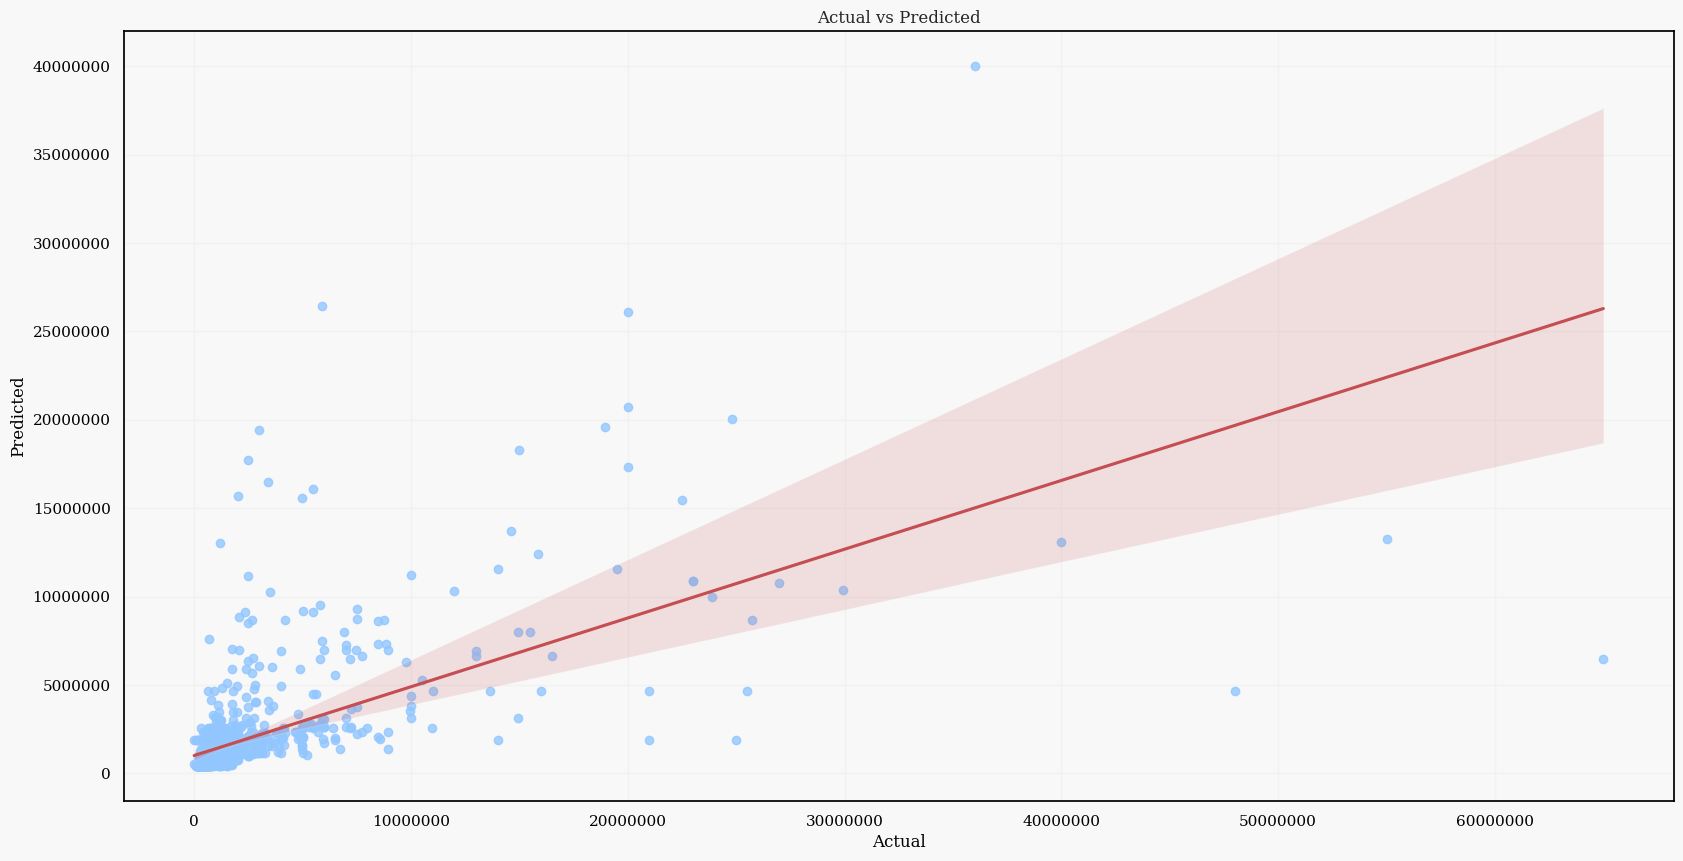

In [47]:
fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=y_test, y=y_preds, x_jitter=.20, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')